In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df=pd.read_csv('placement.csv')

In [182]:
df.sample(5)

,cgpa,placement_exam_marks,placed
158,5.74,50.0,0
90,7.61,15.0,1
431,7.64,21.0,0
724,7.95,21.0,0
729,6.79,58.0,1


In [184]:
df.shape

(1000, 3)

Text(0.5, 1.0, 'placement exam marks distribution')

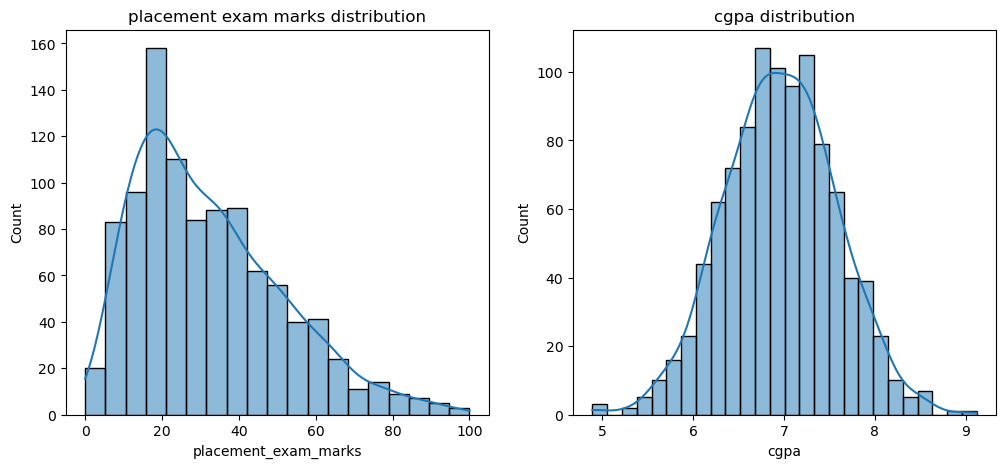

In [186]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.histplot(x=df['cgpa'],kde=True,ax=axes[1])
axes[1].set_title("cgpa distribution")
sns.histplot(x=df['placement_exam_marks'],kde=True,ax=axes[0])
axes[0].set_title("placement exam marks distribution")

In [187]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [188]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

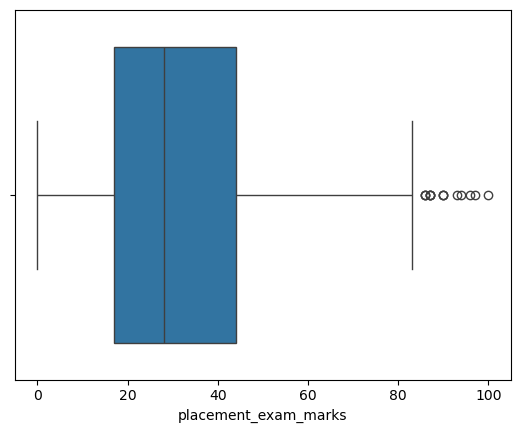

In [189]:
sns.boxplot(x=df['placement_exam_marks'])

In [193]:
#finding IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)
iqr=percetile75-percentile75

In [195]:
percentile25

17.0

In [198]:
percetile75

44.0

In [200]:
iqr=percetile75-percentile25 

In [202]:
iqr

27.0

In [204]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [206]:
upper_limit

84.5

In [208]:
lower_limit

-23.5

__Finding Outliers__

In [211]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [213]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


__Trimming__

In [216]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [218]:
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

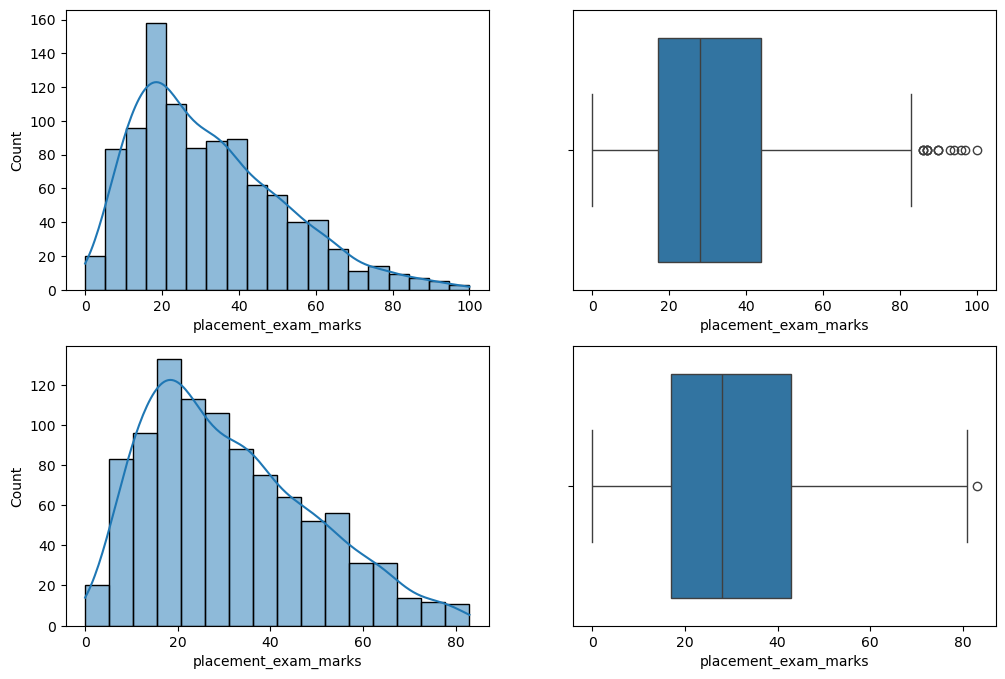

In [220]:
fig,axes=plt.subplots(2,2,figsize=(12,8))
sns.histplot(df['placement_exam_marks'],kde=True,ax=axes[0,0])
sns.boxplot(x=df['placement_exam_marks'],ax=axes[0,1])
sns.histplot(new_df['placement_exam_marks'],kde=True,ax=axes[1,0])
sns.boxplot(x=new_df['placement_exam_marks'],ax=axes[1,1])

__Capping__

In [222]:
newest_df=df.copy()

In [223]:
newest_df.shape

(1000, 3)

In [227]:
newest_df['placement_exam_marks']=np.where(newest_df['placement_exam_marks']>upper_limit,upper_limit,np.where(newest_df['placement_exam_marks']<lower_limit,lower_limit,newest_df['placement_exam_marks']))

In [229]:
newest_df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

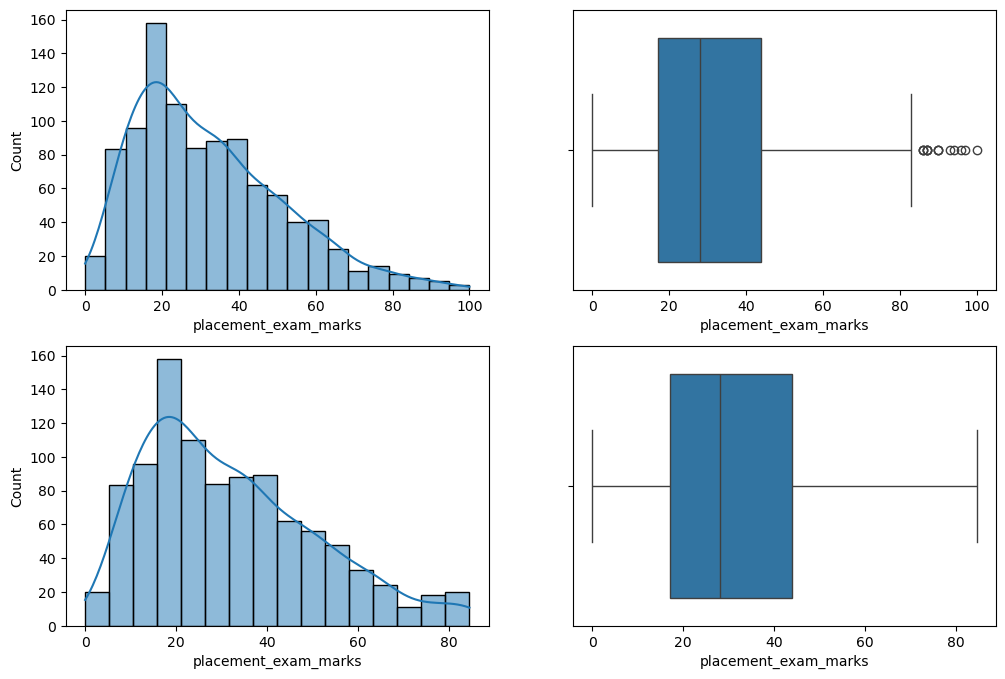

In [232]:
fig,axes=plt.subplots(2,2,figsize=(12,8))
sns.histplot(df['placement_exam_marks'],kde=True,ax=axes[0,0])
sns.boxplot(x=df['placement_exam_marks'],ax=axes[0,1])
sns.histplot(newest_df['placement_exam_marks'],kde=True,ax=axes[1,0])
sns.boxplot(x=newest_df['placement_exam_marks'],ax=axes[1,1])